importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Datasets

In [2]:
train_data=pd.read_csv('Datasets/Train_flight.csv')

In [3]:
test_data=pd.read_csv('Datasets/Test_flight.csv')

Perform EDA

In [4]:
train_data.shape

(10683, 11)

In [5]:
test_data.shape

(2671, 10)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
#combining train and test dataset
fp=train_data.append(test_data)

In [11]:
fp.shape

(13354, 11)

In [12]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


As all the columns are of categorical type. Each columns should be handled one by one.

Handling Date_of_Journey column and coverting into int

In [13]:
fp['Day']=fp['Date_of_Journey'].str.split('/').str[0].astype(int)
fp['Month']=fp['Date_of_Journey'].str.split('/').str[1].astype(int)
fp['Year']=fp['Date_of_Journey'].str.split('/').str[2].astype(int)

In [14]:
#Droping the Date_of_Journey coulmn
fp.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
fp.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [16]:
#Droping the Year column because As we can see only 1 value is there in entire column,hence can be removed
fp.drop(['Year'],axis=1,inplace=True)

Handling Arrival_Time cloumn

In [17]:
fp['Arrival_Hour']=pd.to_datetime(fp['Arrival_Time']).dt.hour
fp['Arrival_min']=pd.to_datetime(fp.Arrival_Time).dt.minute

In [18]:
fp.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,21,35


In [19]:
#Drop Arrival_Time 
fp.drop(['Arrival_Time'],axis=1,inplace=True)

Handling Dep_Time

In [20]:
fp['Dep_Hour']=pd.to_datetime(fp.Dep_Time).dt.hour
fp['Dep_min']=pd.to_datetime(fp.Dep_Time).dt.minute

In [21]:
#Drop Dep_Time
fp.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
fp.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302.0,1,3,21,35,16,50


In [23]:
fp.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Day                   0
Month                 0
Arrival_Hour          0
Arrival_min           0
Dep_Hour              0
Dep_min               0
dtype: int64

In [24]:
#Checking unique value in Total_stops
fp['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [25]:
#Filling nan value with '1 stop'
fp['Total_Stops'].fillna('1 stop',inplace=True)

In [26]:
#Replacing values for Total_Stops column
fp.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [27]:
fp['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [28]:
fp.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,0,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2,No info,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1,No info,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1,No info,13302.0,1,3,21,35,16,50


In [29]:
#Checking unique values in Additional_Info column
fp['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
#Checking counts of values in Additional_Info
fp['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

Handling Route column and fixing the nan values

In [31]:
fp['Route_1'] = fp['Route'].str.split('?').str[0]
fp['Route_2'] = fp['Route'].str.split('?').str[1]
fp['Route_3'] = fp['Route'].str.split('?').str[2]
fp['Route_4'] = fp['Route'].str.split('?').str[3]
fp['Route_5'] = fp['Route'].str.split('?').str[4]

In [32]:
##fixing the nan values in newly create Route_1,2,3,4,5 columns
fp['Route_1'].fillna('None',inplace = True)
fp['Route_2'].fillna('None',inplace = True)
fp['Route_3'].fillna('None',inplace = True)
fp['Route_4'].fillna('None',inplace = True)
fp['Route_5'].fillna('None',inplace = True)


Droping Duration column as we have already handled arrival and departure time.

Duration is diff btw arrival and departure time and also droping Additonal_Info for having more No_info values and droping Route cloumn

In [33]:
fp.drop(['Duration','Additional_Info','Route'],axis=1,inplace=True)

In [34]:
fp.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,3897.0,24,3,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,7662.0,1,5,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,13882.0,9,6,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,6218.0,12,5,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,13302.0,1,3,21,35,16,50,BLR,NAG,DEL,None,None


In [35]:
fp.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Price           2671
Day                0
Month              0
Arrival_Hour       0
Arrival_min        0
Dep_Hour           0
Dep_min            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

-> As we can see there are 2671 missing values in price column. This is beacuse we have merged test and train dataset and in test dataset there is not price column.

-> we don't need to handle this as we will again be splitting it into train and test data

In [36]:
fp.dtypes

Airline          object
Source           object
Destination      object
Total_Stops       int64
Price           float64
Day               int32
Month             int32
Arrival_Hour      int64
Arrival_min       int64
Dep_Hour          int64
Dep_min           int64
Route_1          object
Route_2          object
Route_3          object
Route_4          object
Route_5          object
dtype: object

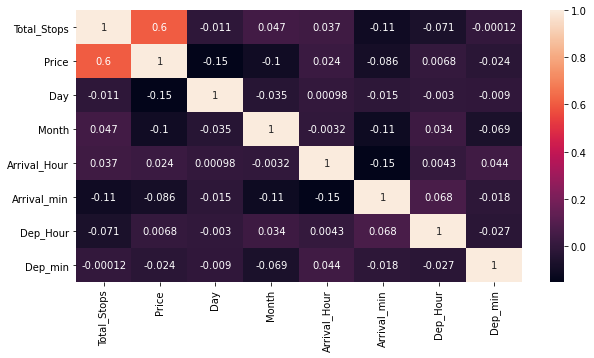

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(fp.corr(),annot=True)

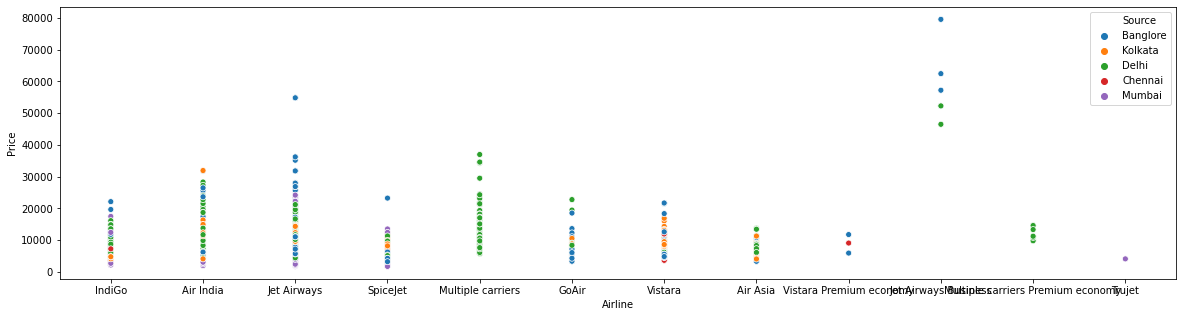

In [38]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Airline',y='Price',hue='Source',data=fp)

<Figure size 1800x1440 with 0 Axes>

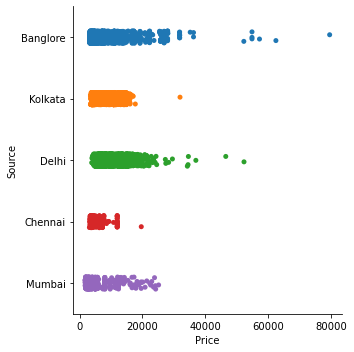

In [39]:
plt.figure(figsize=(25,20))
sns.catplot(x="Price",y="Source",data=fp)

In [40]:
#these are the columns that should be encoded(either label or one hot)
enc_columns=[]
for column in fp.columns:
    if(fp[column].dtype=='object'):
        enc_columns.append(column)
print(enc_columns)

['Airline', 'Source', 'Destination', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']


label encoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder=LabelEncoder()

In [43]:
for column in enc_columns:
    fp[column]=encoder.fit_transform(fp[column])

In [44]:
fp.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,3897.0,24,3,1,10,22,20,0,13,30,13,5
1,1,3,0,2,7662.0,1,5,13,15,5,50,2,25,1,3,5
2,4,2,1,2,13882.0,9,6,4,25,9,25,3,32,4,5,5
3,3,3,0,1,6218.0,12,5,23,30,18,5,2,34,3,13,5
4,3,0,5,1,13302.0,1,3,21,35,16,50,0,34,8,13,5


In [45]:
fp.dtypes

Airline           int32
Source            int32
Destination       int32
Total_Stops       int64
Price           float64
Day               int32
Month             int32
Arrival_Hour      int64
Arrival_min       int64
Dep_Hour          int64
Dep_min           int64
Route_1           int32
Route_2           int32
Route_3           int32
Route_4           int32
Route_5           int32
dtype: object

Separating train and test value again

In [46]:
train_data=fp.iloc[:10683,:]
test_data=fp.iloc[10683:,:]

In [47]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,3897.0,24,3,1,10,22,20,0,13,30,13,5
1,1,3,0,2,7662.0,1,5,13,15,5,50,2,25,1,3,5
2,4,2,1,2,13882.0,9,6,4,25,9,25,3,32,4,5,5
3,3,3,0,1,6218.0,12,5,23,30,18,5,2,34,3,13,5
4,3,0,5,1,13302.0,1,3,21,35,16,50,0,34,8,13,5


In [48]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,1,NaN,6,6,4,25,17,30,3,7,6,13,5
1,3,3,0,1,NaN,12,5,10,20,6,20,2,33,3,13,5
2,4,2,1,1,NaN,21,5,19,0,19,15,3,7,6,13,5
3,6,2,1,1,NaN,21,5,21,0,8,0,3,7,6,13,5
4,0,0,2,0,NaN,24,6,2,45,23,55,0,13,30,13,5


In [49]:
#this is our unseen test data
test_data.drop(['Price'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
test_data.shape

(2671, 15)

In [51]:
train_data.shape

(10683, 16)

In [52]:
#seperating x and y from train data
X = train_data.drop(['Price'],axis = 1)
y = train_data['Price']

In [53]:
X.shape

(10683, 15)

In [54]:
y.shape

(10683,)

Feature Selection

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

In [56]:
selection= ExtraTreesRegressor()

In [57]:
selection.fit(X,y)

ExtraTreesRegressor()

In [58]:
selection.feature_importances_

array([0.1324027 , 0.01148929, 0.02151599, 0.15643191, 0.1550916 ,
       0.05030247, 0.03225766, 0.02036633, 0.03596209, 0.02936265,
       0.01663665, 0.05983749, 0.25178642, 0.02591405, 0.00064271])

In [59]:
X.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Day', 'Month',
       'Arrival_Hour', 'Arrival_min', 'Dep_Hour', 'Dep_min', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

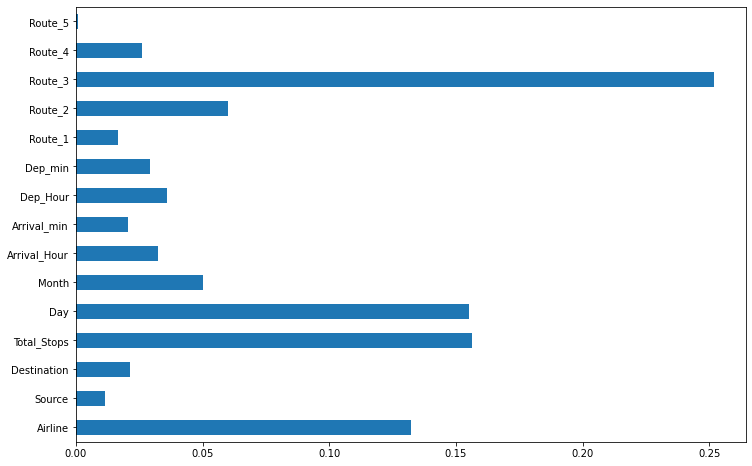

In [60]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

Splitting into train and test

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
#model buliding without any hyperparamter tuning
from sklearn.ensemble import RandomForestRegressor

In [63]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
y_pred=model.predict(x_test)

In [65]:
model.score(x_train,y_train)

0.9563278211211833

In [66]:
model.score(x_test,y_test)

0.8003472936645228

In [67]:
from sklearn.metrics import r2_score

In [68]:
import seaborn as sns

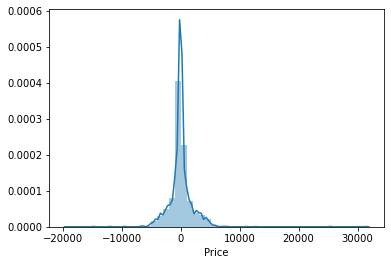

In [69]:
sns.distplot(y_test-y_pred)
plt.show()

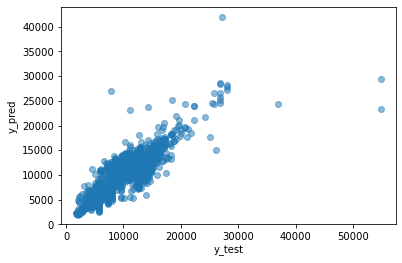

In [70]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [71]:
from sklearn import metrics

In [72]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1164.0009804681877
MSE: 4227399.7721550865
RMSE: 2056.064145924219


In [73]:
r2_score(y_test,y_pred)

0.8003472936645228

RandomForestRegressor with hyperparameter tuning

In [74]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [75]:
# Maximum number of levels in tree
max_depth=randint(5,20)
# Number of features to consider at every split
max_features=['auto', 'sqrt']
# Number of trees in random forest
n_estimators=randint(100,250)



In [76]:
# Create the param_distributions
params={
    'max_depth':max_depth,
    'max_features':max_features,
    'n_estimators':n_estimators
}

In [77]:
# First create the base model to tune
model=RandomForestRegressor()

In [78]:
# Random search of parameters, using 5 fold cross validation
random_search=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,verbose=2, random_state=42, n_jobs = 1)


In [79]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_depth=11, max_features=sqrt, n_estimators=192 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=11, max_features=sqrt, n_estimators=192, total=   4.4s
[CV] max_depth=11, max_features=sqrt, n_estimators=192 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  max_depth=11, max_features=sqrt, n_estimators=192, total=   3.7s
[CV] max_depth=11, max_features=sqrt, n_estimators=192 ...............
[CV]  max_depth=11, max_features=sqrt, n_estimators=192, total=   4.2s
[CV] max_depth=11, max_features=sqrt, n_estimators=192 ...............
[CV]  max_depth=11, max_features=sqrt, n_estimators=192, total=   3.9s
[CV] max_depth=11, max_features=sqrt, n_estimators=192 ...............
[CV]  max_depth=11, max_features=sqrt, n_estimators=192, total=   3.9s
[CV] max_depth=19, max_features=auto, n_estimators=171 ...............
[CV]  max_depth=19, max_features=auto, n_estimators=171, total=  11.1s
[CV] max_depth=19, max_features=auto, n_estimators=171 ...............
[CV]  max_depth=19, max_features=auto, n_estimators=171, total=  13.9s
[CV] max_depth=19, max_features=auto, n_estimators=171 ...............
[CV]  max_depth=19, max_features=auto, n_estimators=171, total=  12.3s
[CV] max_depth=19, max_features=auto, n_estimators=171 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000009FA96DE4F0>,
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000009FA7564B20>},
                   random_state=42, verbose=2)

In [80]:
y_pred=random_search.predict(x_test)

Hurray finally done with feature engineering part

In [81]:
random_search.best_estimator_

RandomForestRegressor(max_depth=14, n_estimators=174)

In [82]:
random_search.best_score_

0.8427038475487973

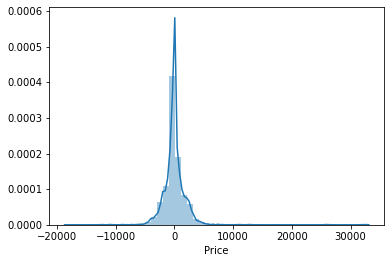

In [83]:
sns.distplot(y_test-y_pred)
plt.show()

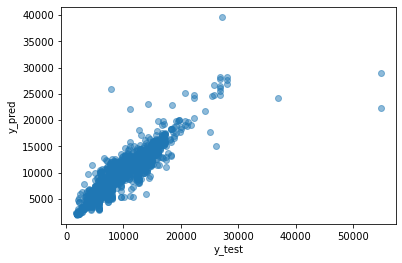

In [84]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [85]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1092.837224215293
MSE: 3574618.97356214
RMSE: 1890.666277681532


In [86]:
r2_score(y_test,y_pred)

0.8311769904302193


Prediction on test data

In [87]:
prediction=random_search.predict(test_data)

In [88]:
prediction

array([11808.91427824,  4230.59441542, 14141.02407521, ...,
       14853.23646233, 15628.43724702,  8170.09554666])